In [244]:
#libraries needed
import pandas as pd
# import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
# nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import datetime as dt
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

In [245]:
df =  pd.read_csv('random_saved.csv', dtype = 'unicode')
df.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,0,2022-12-01 23:59:52+00:00,1598466944507723777,https://twitter.com/Legacybozz1/status/1598466...,Legacybozz1,Twitter for Android,"Abuja, Nigeria",@BoySpyce 😁🙏🙏🙏,0,0
1,1,2022-12-01 23:59:33+00:00,1598466865394745349,https://twitter.com/IsmailAliyuAbd3/status/159...,IsmailAliyuAbd3,Twitter for Android,Nigeria,"But alas, kudiratu was the lucky chirp yeah? h...",0,0
2,2,2022-12-01 23:59:26+00:00,1598466837796249600,https://twitter.com/LekkyFrosh1/status/1598466...,LekkyFrosh1,Twitter for Android,"Lagos, Nigeria",@Objlynks @BNXN @BNXN i really want to meet yo...,0,0
3,3,2022-12-01 23:59:25+00:00,1598466833438412802,https://twitter.com/LukenIsrael/status/1598466...,LukenIsrael,Twitter for Android,NaN,@kelemoshane Long life and prosperity,0,0
4,4,2022-12-01 23:59:25+00:00,1598466831827828736,https://twitter.com/growthmindsetll/status/159...,growthmindsetll,Twitter for Android,"Brooklyn, New York",ingredient in creative achievement. And it was...,2,1


In [246]:
#dropping unnamed column
to_drop = ['Unnamed: 0']
 
df.drop(to_drop, inplace=True, axis=1)

df.head()

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,2022-12-01 23:59:52+00:00,1598466944507723777,https://twitter.com/Legacybozz1/status/1598466...,Legacybozz1,Twitter for Android,"Abuja, Nigeria",@BoySpyce 😁🙏🙏🙏,0,0
1,2022-12-01 23:59:33+00:00,1598466865394745349,https://twitter.com/IsmailAliyuAbd3/status/159...,IsmailAliyuAbd3,Twitter for Android,Nigeria,"But alas, kudiratu was the lucky chirp yeah? h...",0,0
2,2022-12-01 23:59:26+00:00,1598466837796249600,https://twitter.com/LekkyFrosh1/status/1598466...,LekkyFrosh1,Twitter for Android,"Lagos, Nigeria",@Objlynks @BNXN @BNXN i really want to meet yo...,0,0
3,2022-12-01 23:59:25+00:00,1598466833438412802,https://twitter.com/LukenIsrael/status/1598466...,LukenIsrael,Twitter for Android,NaN,@kelemoshane Long life and prosperity,0,0
4,2022-12-01 23:59:25+00:00,1598466831827828736,https://twitter.com/growthmindsetll/status/159...,growthmindsetll,Twitter for Android,"Brooklyn, New York",ingredient in creative achievement. And it was...,2,1


# Data cleaning

In [247]:
df.shape

(225570, 9)

In [248]:
df.columns

Index(['Date', 'ID', 'url', 'username', 'source', 'location', 'tweet',
       'num_of_likes', 'num_of_retweet'],
      dtype='object')

In [249]:
df.dtypes

Date              object
ID                object
url               object
username          object
source            object
location          object
tweet             object
num_of_likes      object
num_of_retweet    object
dtype: object

In [250]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

Converting to the appropriate data types


In [251]:
#checking for empty columns

df.isna().sum()

Date                  0
ID                    0
url                   0
username              0
source                0
location          33973
tweet                 0
num_of_likes          0
num_of_retweet        0
dtype: int64

Exceptation: Clean this data by removing columns with at least 70% row nulls, for those with less than 30% rows nulls, replace with ‘Not Available’, for integer type, replace with mean values in the column.

In [252]:
#dropping num_retweet
#replacing source and location

df['location'] = df['location'].fillna('Not Available')

In [253]:
df

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet
0,2022-12-01,1598466944507723777,https://twitter.com/Legacybozz1/status/1598466...,Legacybozz1,Twitter for Android,"Abuja, Nigeria",@BoySpyce 😁🙏🙏🙏,0,0
1,2022-12-01,1598466865394745349,https://twitter.com/IsmailAliyuAbd3/status/159...,IsmailAliyuAbd3,Twitter for Android,Nigeria,"But alas, kudiratu was the lucky chirp yeah? h...",0,0
2,2022-12-01,1598466837796249600,https://twitter.com/LekkyFrosh1/status/1598466...,LekkyFrosh1,Twitter for Android,"Lagos, Nigeria",@Objlynks @BNXN @BNXN i really want to meet yo...,0,0
3,2022-12-01,1598466833438412802,https://twitter.com/LukenIsrael/status/1598466...,LukenIsrael,Twitter for Android,Not Available,@kelemoshane Long life and prosperity,0,0
4,2022-12-01,1598466831827828736,https://twitter.com/growthmindsetll/status/159...,growthmindsetll,Twitter for Android,"Brooklyn, New York",ingredient in creative achievement. And it was...,2,1
...,...,...,...,...,...,...,...,...,...
225565,2022-12-05,1599554248366178305,https://twitter.com/GoldenH13843226/status/159...,GoldenH13843226,Twitter for Android,Not Available,@01gX439m2SvGo0 Yez He's Coming ObiDatti,1,0
225566,2022-12-05,1599554224177545217,https://twitter.com/marvix_music/status/159955...,marvix_music,Twitter for Android,Not Available,Prayer for a better day https://t.co/UWYvaZf8WM,0,0
225567,2022-12-05,1599554220176289792,https://twitter.com/tunji_adetomiwa/status/159...,tunji_adetomiwa,Twitter for Android,"Lagos, Nigeria",Nowhere in the world do politicians make a lot...,0,0
225568,2022-12-05,1599554187477458946,https://twitter.com/___Muktar/status/159955418...,___Muktar,Twitter for iPhone,Abuja || kaduna,@hajjokamal Ameen thank you,0,0


In [254]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
df['cleanedTweets'] = df['tweet'].apply(cleanTweets) #apply cleanTweet function to the tweet
df.head() #compares original tweets with cleaned Tweets

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,cleanedTweets
0,2022-12-01,1598466944507723777,https://twitter.com/Legacybozz1/status/1598466...,Legacybozz1,Twitter for Android,"Abuja, Nigeria",@BoySpyce 😁🙏🙏🙏,0,0,😁🙏🙏🙏
1,2022-12-01,1598466865394745349,https://twitter.com/IsmailAliyuAbd3/status/159...,IsmailAliyuAbd3,Twitter for Android,Nigeria,"But alas, kudiratu was the lucky chirp yeah? h...",0,0,"But alas, kudiratu was the lucky chirp yeah?"
2,2022-12-01,1598466837796249600,https://twitter.com/LekkyFrosh1/status/1598466...,LekkyFrosh1,Twitter for Android,"Lagos, Nigeria",@Objlynks @BNXN @BNXN i really want to meet yo...,0,0,i really want to meet you You inspired me t...
3,2022-12-01,1598466833438412802,https://twitter.com/LukenIsrael/status/1598466...,LukenIsrael,Twitter for Android,Not Available,@kelemoshane Long life and prosperity,0,0,Long life and prosperity
4,2022-12-01,1598466831827828736,https://twitter.com/growthmindsetll/status/159...,growthmindsetll,Twitter for Android,"Brooklyn, New York",ingredient in creative achievement. And it was...,2,1,ingredient in creative achievement. And it was...


In [255]:
# Lowercase 
df['tweet']=df['tweet'].str.lower()
df['cleanedTweets']=df['cleanedTweets'].str.lower()
df.head()

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,cleanedTweets
0,2022-12-01,1598466944507723777,https://twitter.com/Legacybozz1/status/1598466...,Legacybozz1,Twitter for Android,"Abuja, Nigeria",@boyspyce 😁🙏🙏🙏,0,0,😁🙏🙏🙏
1,2022-12-01,1598466865394745349,https://twitter.com/IsmailAliyuAbd3/status/159...,IsmailAliyuAbd3,Twitter for Android,Nigeria,"but alas, kudiratu was the lucky chirp yeah? h...",0,0,"but alas, kudiratu was the lucky chirp yeah?"
2,2022-12-01,1598466837796249600,https://twitter.com/LekkyFrosh1/status/1598466...,LekkyFrosh1,Twitter for Android,"Lagos, Nigeria",@objlynks @bnxn @bnxn i really want to meet yo...,0,0,i really want to meet you you inspired me t...
3,2022-12-01,1598466833438412802,https://twitter.com/LukenIsrael/status/1598466...,LukenIsrael,Twitter for Android,Not Available,@kelemoshane long life and prosperity,0,0,long life and prosperity
4,2022-12-01,1598466831827828736,https://twitter.com/growthmindsetll/status/159...,growthmindsetll,Twitter for Android,"Brooklyn, New York",ingredient in creative achievement. and it was...,2,1,ingredient in creative achievement. and it was...


In [256]:
#save the cleaned tweets to a .csv file and load them into the notebook

df.to_csv('tweets_random_13.csv') #write dataframe into csv file

In [257]:
df['cleanedTweets'].head()

0                                                 😁🙏🙏🙏
1        but alas, kudiratu was the lucky chirp yeah? 
2       i really want to meet you you inspired me t...
3                             long life and prosperity
4    ingredient in creative achievement. and it was...
Name: cleanedTweets, dtype: object

# Detect sentiments

In [258]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['cleanedTweets'].apply(getSubjectivity)
df['Polarity'] = df['cleanedTweets'].apply(getPolarity)
# df.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

In [259]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,cleanedTweets,Subjectivity,Polarity,Analysis
0,2022-12-01,1598466944507723777,https://twitter.com/Legacybozz1/status/1598466...,Legacybozz1,Twitter for Android,"Abuja, Nigeria",@boyspyce 😁🙏🙏🙏,0,0,😁🙏🙏🙏,0.000000,0.000000,Neutral
1,2022-12-01,1598466865394745349,https://twitter.com/IsmailAliyuAbd3/status/159...,IsmailAliyuAbd3,Twitter for Android,Nigeria,"but alas, kudiratu was the lucky chirp yeah? h...",0,0,"but alas, kudiratu was the lucky chirp yeah?",0.916667,-0.033333,Negative
2,2022-12-01,1598466837796249600,https://twitter.com/LekkyFrosh1/status/1598466...,LekkyFrosh1,Twitter for Android,"Lagos, Nigeria",@objlynks @bnxn @bnxn i really want to meet yo...,0,0,i really want to meet you you inspired me t...,0.200000,0.200000,Positive
3,2022-12-01,1598466833438412802,https://twitter.com/LukenIsrael/status/1598466...,LukenIsrael,Twitter for Android,Not Available,@kelemoshane long life and prosperity,0,0,long life and prosperity,0.400000,-0.050000,Negative
4,2022-12-01,1598466831827828736,https://twitter.com/growthmindsetll/status/159...,growthmindsetll,Twitter for Android,"Brooklyn, New York",ingredient in creative achievement. and it was...,2,1,ingredient in creative achievement. and it was...,0.540000,0.256667,Positive


In [260]:
df['Analysis'].value_counts() #shows the counts of tweets' polarity

Neutral     120187
Positive     79105
Negative     26278
Name: Analysis, dtype: int64

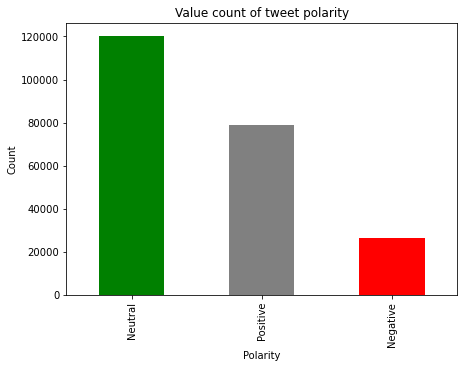

<Figure size 432x288 with 0 Axes>

In [261]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
#xlabel = ['Positive','Negative','Neutral']
#plt.bar(xlabel,df['Analysis'].value_counts(), color = color)
color = ['green','grey','red']
df['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()
plt.savefig('random_fig1.png')

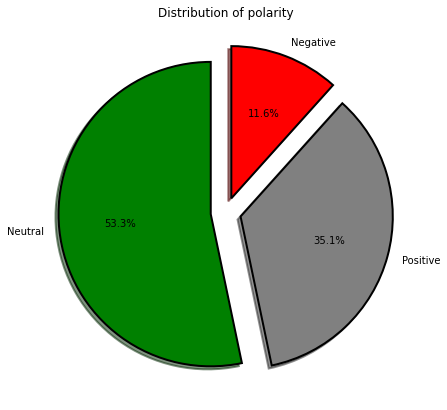

In [262]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

plt.savefig('random_fig2.png')

In [263]:
# plot the polarity and subjectivity on a scatter plot
# plt.figure(figsize=(9,7))
# for i in range(0,df.shape[0]):
#     plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='blue')
# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()
# plt.savefig('random_fig3.png')

In [264]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

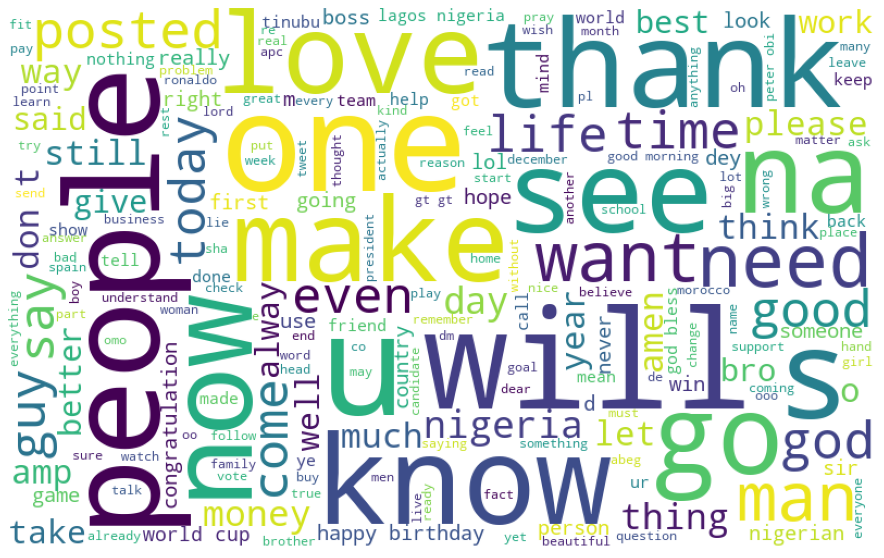

In [265]:
#plot wordcloud for all tweets
allTweets = df['cleanedTweets']
create_wordcloud(allTweets)

In [266]:
plt.savefig('random_fig4.png')

<Figure size 432x288 with 0 Axes>

In [267]:
# Load NLTK library
#Langauage processing libraries
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Visacheck
[nltk_data]     Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [268]:
# get the list of all stopwords from the library (Language - 'en')
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [269]:
# Removing the words in 'stop' list
def remove_stop_words(tweet):
  tokens = tweet.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string
  
df['cleanedTweets'] = df['cleanedTweets'].apply(remove_stop_words)
df.tail()

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,cleanedTweets,Subjectivity,Polarity,Analysis
225565,2022-12-05,1599554248366178305,https://twitter.com/GoldenH13843226/status/159...,GoldenH13843226,Twitter for Android,Not Available,@01gx439m2svgo0 yez he's coming obidatti,1,0,yez he's coming obidatti,0.000000,0.000000,Neutral
225566,2022-12-05,1599554224177545217,https://twitter.com/marvix_music/status/159955...,marvix_music,Twitter for Android,Not Available,prayer for a better day https://t.co/uwyvazf8wm,0,0,prayer better day,0.500000,0.500000,Positive
225567,2022-12-05,1599554220176289792,https://twitter.com/tunji_adetomiwa/status/159...,tunji_adetomiwa,Twitter for Android,"Lagos, Nigeria",nowhere in the world do politicians make a lot...,0,0,"nowhere world politicians make lot money, stea...",0.000000,0.000000,Neutral
225568,2022-12-05,1599554187477458946,https://twitter.com/___Muktar/status/159955418...,___Muktar,Twitter for iPhone,Abuja || kaduna,@hajjokamal ameen thank you,0,0,ameen thank,0.000000,0.000000,Neutral
225569,2022-12-05,1599554179999367168,https://twitter.com/CinnatiLove/status/1599554...,CinnatiLove,Twitter for Android,"Granada, Spain",so i dropped my new single today for my birthd...,1,1,dropped new single today birthday boy one peru...,0.556277,0.021645,Positive


In [270]:
df.head()

,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,cleanedTweets,Subjectivity,Polarity,Analysis
0,2022-12-01,1598466944507723777,https://twitter.com/Legacybozz1/status/1598466...,Legacybozz1,Twitter for Android,"Abuja, Nigeria",@boyspyce 😁🙏🙏🙏,0,0,😁🙏🙏🙏,0.000000,0.000000,Neutral
1,2022-12-01,1598466865394745349,https://twitter.com/IsmailAliyuAbd3/status/159...,IsmailAliyuAbd3,Twitter for Android,Nigeria,"but alas, kudiratu was the lucky chirp yeah? h...",0,0,"alas, kudiratu lucky chirp yeah?",0.916667,-0.033333,Negative
2,2022-12-01,1598466837796249600,https://twitter.com/LekkyFrosh1/status/1598466...,LekkyFrosh1,Twitter for Android,"Lagos, Nigeria",@objlynks @bnxn @bnxn i really want to meet yo...,0,0,really want meet inspired sing write songs ple...,0.200000,0.200000,Positive
3,2022-12-01,1598466833438412802,https://twitter.com/LukenIsrael/status/1598466...,LukenIsrael,Twitter for Android,Not Available,@kelemoshane long life and prosperity,0,0,long life prosperity,0.400000,-0.050000,Negative
4,2022-12-01,1598466831827828736,https://twitter.com/growthmindsetll/status/159...,growthmindsetll,Twitter for Android,"Brooklyn, New York",ingredient in creative achievement. and it was...,2,1,ingredient creative achievement. exactly kind ...,0.540000,0.256667,Positive


In [286]:
#location analysis
#removing any location that is not english or undefined
# df["location"].unique()

In [284]:
# df['location']

In [285]:
# remove all rows where location is not english or undefined
# df = df[df["location"].isin([ 'Not Available', 'Nigeria'])]

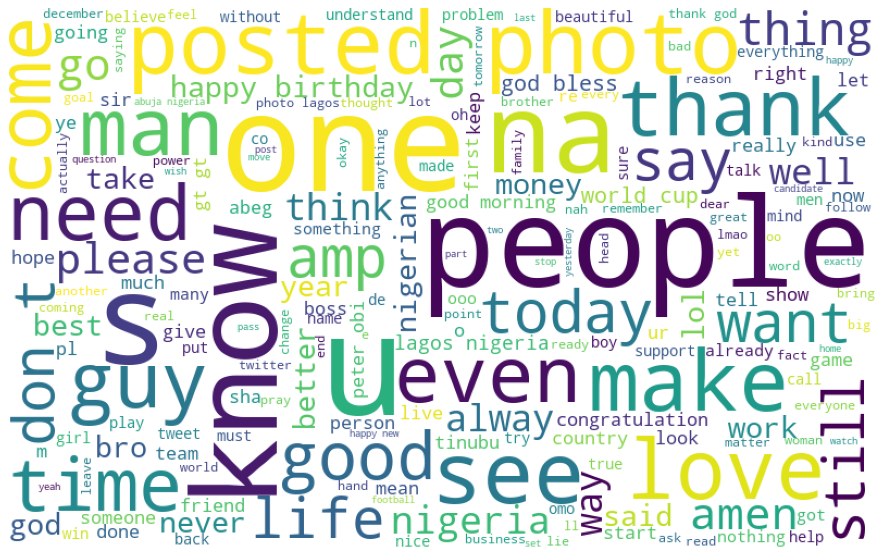

In [272]:
#plot wordcloud for all tweets after removing stopwords
allTweets = df['cleanedTweets']
create_wordcloud(allTweets)

In [228]:
plt.savefig('random_fig5.png')

<Figure size 432x288 with 0 Axes>

# Word frequecy analysis

In [273]:
# get the percentage of positive tweets
pTweets = df[df['Analysis']=='Positive']
pTweets = pTweets['cleanedTweets']
percentage = round((pTweets.shape[0]/df.shape[0]) *100,1)
print('Percentage of positive tweets: {0}%'.format(percentage))

Percentage of positive tweets: 35.1%


In [274]:
# get the percentage of negative tweets
nTweets = df[df['Analysis']=='Negative']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/df.shape[0]) *100,1)
print('Percentage of negative tweets: {0}%'.format(percentage))

Percentage of negative tweets: 11.6%


In [275]:
# Creating a word frequency series
#(This is a **pandas** series)
word_frequency = pd.Series(' '.join(df['cleanedTweets']).split()).value_counts()

In [276]:
# Display top 10 words
word_frequency[:10]

go         9664
dey        9359
like       8638
one        7822
god        7377
u          6750
nigeria    6702
people     6678
good       6648
see        6587
dtype: int64

C:\Users\Visacheck Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


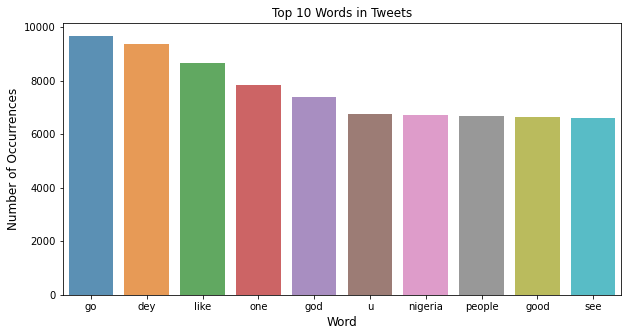

In [277]:
# Visualizing the top 10 word counts 

word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Top 10 Words in Tweets')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

# Temporal analysis

In [278]:
# Group the twitter dataset based on the date field and get the count per each day.
df_date_wise = df.groupby(['Date'])['tweet'].count().reset_index(name='random_tweet').set_index('Date')

#Display top n 
df_date_wise.head(10)

,random_tweet
Date,
2022-12-01,20001
2022-12-03,20001
2022-12-04,48194
2022-12-05,45269
2022-12-06,92105


<Figure size 720x360 with 0 Axes>

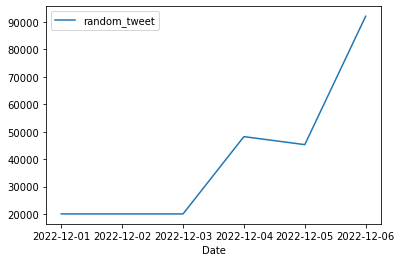

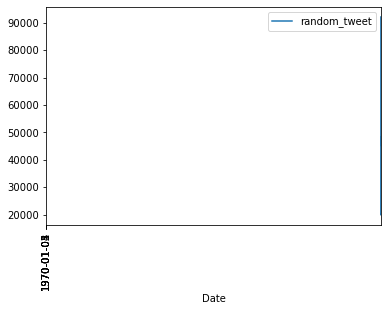

In [279]:
# Plot twitter activity timeline.
plt.figure(figsize=(10, 5))
ax = df_date_wise.plot()
df_date_wise.plot()
plt.xticks(np.arange(len(df_date_wise.index)), rotation=90)
plt.xlabel('Date')
plt.savefig('temporal_analysis.png', dpi=800)

In [280]:
df_senti_date_wise = df.groupby(['Date'])['Subjectivity'].mean().reset_index(name='mean_Subjectivity').set_index('Date')

Text(0.5, 0, 'Date')

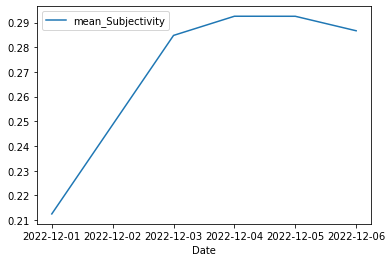

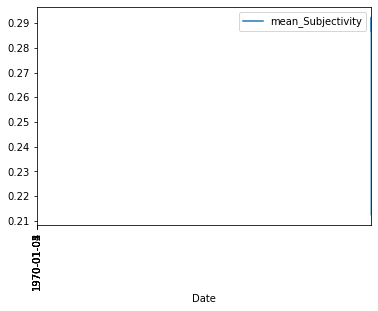

In [281]:
# Plot twitter sentimet timeline 
ax = df_senti_date_wise.plot()
df_senti_date_wise.plot()
plt.xticks(np.arange(len(df_senti_date_wise.index)), rotation=90)
plt.xlabel('Date')

In [287]:
df.to_csv('final_tweets_random_13.csv') #write dataframe into csv file